# Raport z zadania sztuczne sieci neuronowe
### Aleksander Szymczyk (aleksander.szymczyk.stud@pw.edu.pl)

In [1]:
from preprocessing import load_dataset
from experiment import experiment, plot_costs
import pandas as pd

2024-01-11 03:43:12.380387: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-11 03:43:12.380469: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-11 03:43:12.381707: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-11 03:43:12.391184: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-11 03:43:14.224089: W tensorflow/compiler/tf2

## Decyzje projektowe
- Początkowe parametry inicjalizowane są za pomocą metody He initialization. Została wybrana, ponieważ unika zbyt dużego zniejszania/przyrostu wielkości wejściowych wag przy wykorzystaniu funkcji aktywacji ReLU.
- Funkcjami aktywacji kolejnych warstw ukrytych jest funkcja ReLU. Funkcją aktywacji ostatniej warstwy jest Softmax.
- Funkcja kosztu to cross-entropy loss.
- Dane treningowe dzielone są na batche o zadanym rozmiarze. W trakcie treningu obrazy do batchy dobierane są losowo.
## Wstępne przetwarzanie danych
- Zbiór danych został podzielony na 10000 obrazów w zbiorze treningowym, 1000 w zbiorze walidacyjnym i 2000 w zbiorze testowym. 
- Zbiór danych składa się z obrazów o wymiarach 14x14.
- Po załadowaniu obrazy są spłaszczane i skalowane by mieć wartości pomiędzy 0 a 1.
- Labele w zbiorach Y zamieniane są na wektory one-hot.

In [2]:
X_train, Y_train, X_dev, Y_dev, X_test, Y_test = load_dataset()

# Trenowanie oraz walidacja

In [3]:
LAYERS_DIMS = [[196, 100, 20, 5, 10], [196, 5, 10], [196, 50, 20, 10], [196, 20, 10], [196, 50, 10]]
LEARNING_RATES = [0.002, 0.001, 0.0005, 0.006, 0.001]
BATCHES = [1024, 64, 512, 128, 256]
EPOCHS = [2000, 2000, 2000, 2000, 2000]
results, costs, best_model = experiment(LAYERS_DIMS, LEARNING_RATES, (X_train, Y_train, X_dev, Y_dev), BATCHES, EPOCHS)
df = pd.DataFrame(results)
df

6


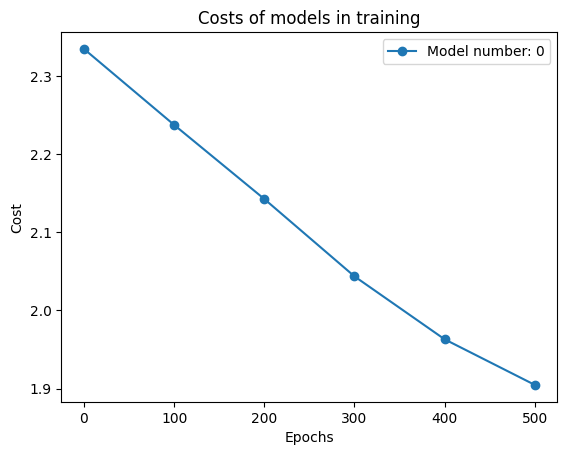

In [ ]:
plot_costs(costs)

In [ ]:
accuracy_test = best_model.predict(X_test, Y_test)
print(f"Accuracy: {accuracy_test}")

Accuracy: 0.3312


# Wyniki
# Wnioski